# 1. Inicialización y exploración del entorno 

**Requirements:**

In [1]:
!pip install gym
!pip install torch
!pip install highway_env
!pip install stable_baselines3

  Using cached gym-0.21.0-py3-none-any.whl
  Using cached torch-1.10.1-cp38-cp38-manylinux1_x86_64.whl (881.9 MB)
  Using cached highway_env-1.4-py3-none-any.whl (97 kB)
  Using cached pygame-2.1.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21.8 MB)
  Using cached stable_baselines3-1.3.0-py3-none-any.whl (174 kB)
  Using cached gym-0.19.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0


In [2]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
import time
import highway_env


## Ejercicio 1.1 (0.5 puntos)

In [5]:
env = gym.make("highway-v0")
env.reset()
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("Action: {} -> reward: {} and info: {}".format(action, reward,info))

env.close()

Action: 2 -> reward: 0.8222222222222223 and info: {'speed': 25.0, 'crashed': False, 'action': 2, 'cost': 0.0}
Action: 0 -> reward: 0.7999999999999999 and info: {'speed': 25.0, 'crashed': False, 'action': 0, 'cost': 0.0}
Action: 4 -> reward: 0.6894517646168187 and info: {'speed': 20.8544411731307, 'crashed': False, 'action': 4, 'cost': 0.0}
Action: 1 -> reward: 0.6705603718311518 and info: {'speed': 20.146013943668194, 'crashed': False, 'action': 1, 'cost': 0.0}
Action: 2 -> reward: 0.6895542772906024 and info: {'speed': 20.024952065064255, 'crashed': False, 'action': 2, 'cost': 0.0}
Action: 4 -> reward: 0.6890025959381983 and info: {'speed': 20.004264014349108, 'crashed': False, 'action': 4, 'cost': 0.0}
Action: 1 -> reward: 0.6889083200858099 and info: {'speed': 20.00072866988454, 'crashed': False, 'action': 1, 'cost': 0.0}
Action: 4 -> reward: 0.6888922094518275 and info: {'speed': 20.000124521110198, 'crashed': False, 'action': 4, 'cost': 0.0}
Action: 0 -> reward: 0.6666672341118053

## Ejercicio 2.1 (1.5 puntos)

In [3]:
env.config['observation']['type']

'Kinematics'

In [3]:
from stable_baselines3 import DQN


In [4]:
from stable_baselines3.dqn.policies import DQNPolicy

In [6]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=32,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Ejercicio 2.2 (1 punto)

In [5]:
import statistics

In [6]:
from stable_baselines3.common.evaluation import evaluate_policy

In [7]:
def evaluate_results(rewards_episode):
    plt.figure(figsize=(12,8))
    plt.plot(rewards_episode, label = "Rewards")
    plt.xlabel('Episodes')
    plt.ylabel('Rewards')
    plt.legend(loc="upper left")
    plt.show()
    
    print(statistics.mean(rewards_episode))
    print(statistics.stdev(rewards_episode))

In [61]:
env = gym.make("highway-v0")

In [20]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

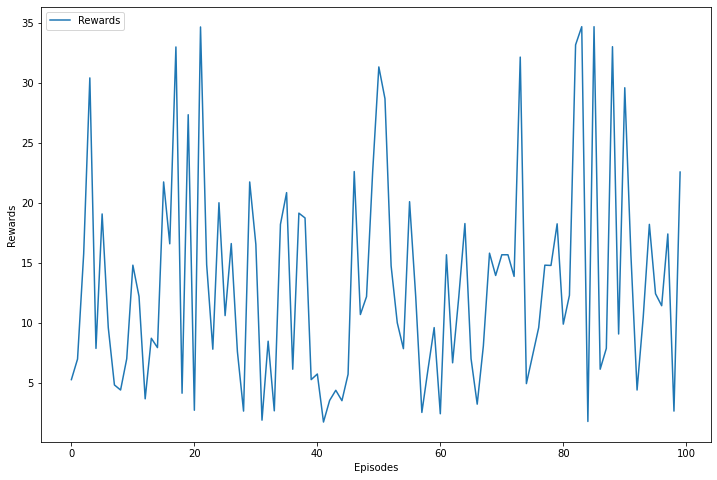

13.31438136825338
8.956954135085281


In [21]:
evaluate_results(rewards_episode)

Aumentamos el valor de **batch_size**

In [22]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [23]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

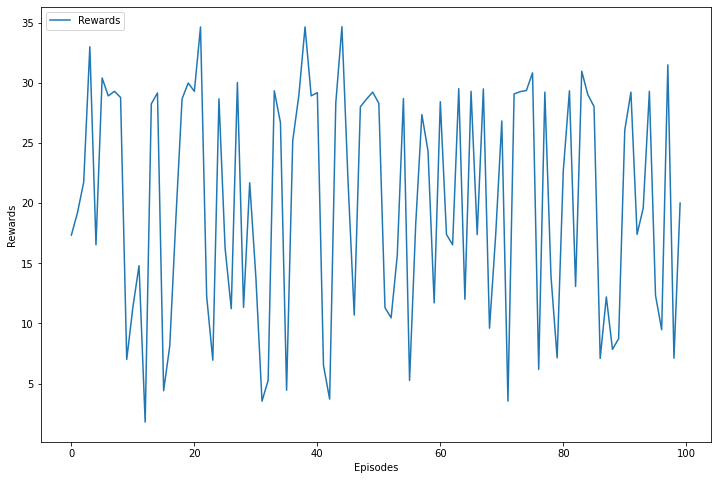

20.160101979373866
9.61937683813461


In [24]:
evaluate_results(rewards_episode)

Como ha resultado una mejoría, nos quedamos con el nuevo valor de **batch_size**

Aumentamos el valor de **buffer_size**

In [25]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=100,
            buffer_size=2000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [26]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

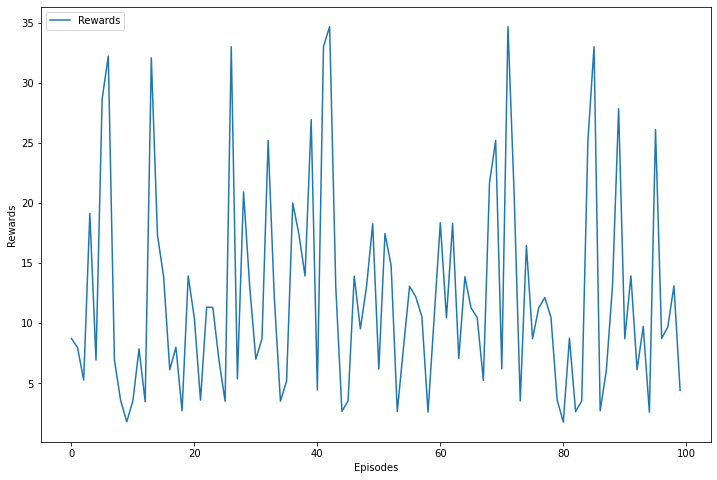

12.31092554859817
8.729967519039393


In [27]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **buffer_size**

Aumentamos el valor de **target_update_interval**

In [10]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=10000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [16]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

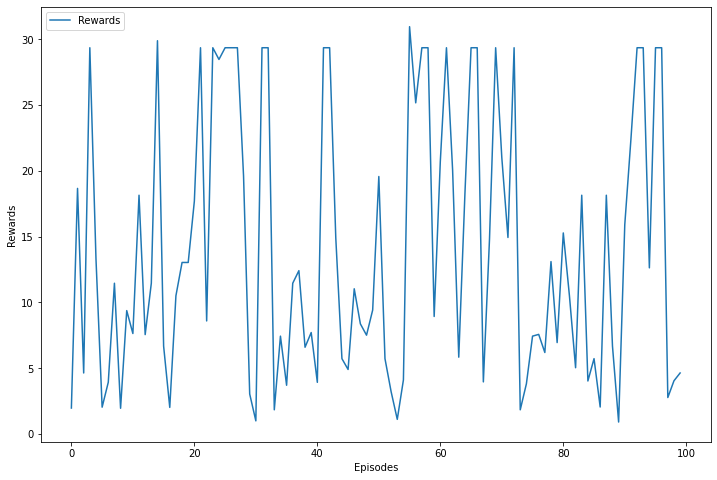

14.135831470210105
10.180282838378526


In [17]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **target_update_interval**

Aumentamos el valor de **train_freq**

In [18]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 7,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [19]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

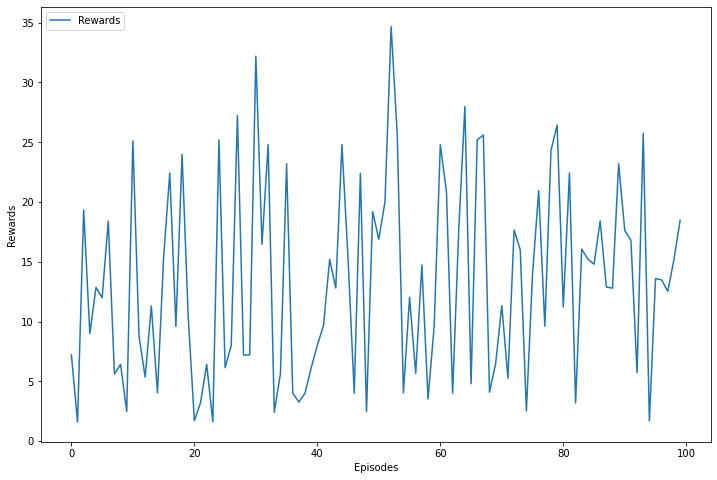

13.288669810360297
8.269816917869234


In [20]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **train_freq**

Disminuimos el valor de **learning_rate**

In [21]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.0001,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [22]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

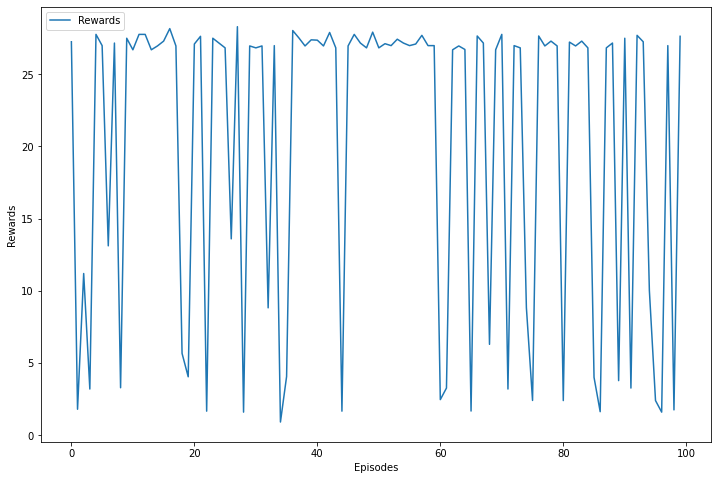

20.393043210608884
10.671320177993193


In [23]:
evaluate_results(rewards_episode)

In [24]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.01,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [25]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

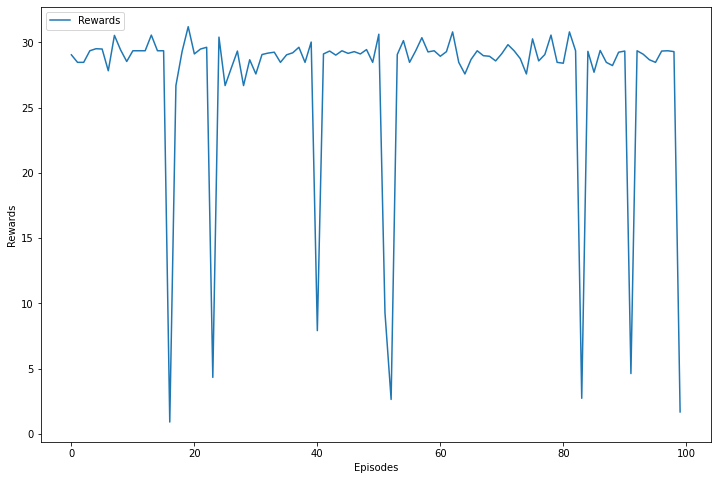

27.1156904143095
6.864540828927969


In [26]:
evaluate_results(rewards_episode)

Aumentamos el número de capas de la red neuronal que estamos utilizando (**net_arch**)

In [27]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256,256]),
            learning_rate=0.01,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [28]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

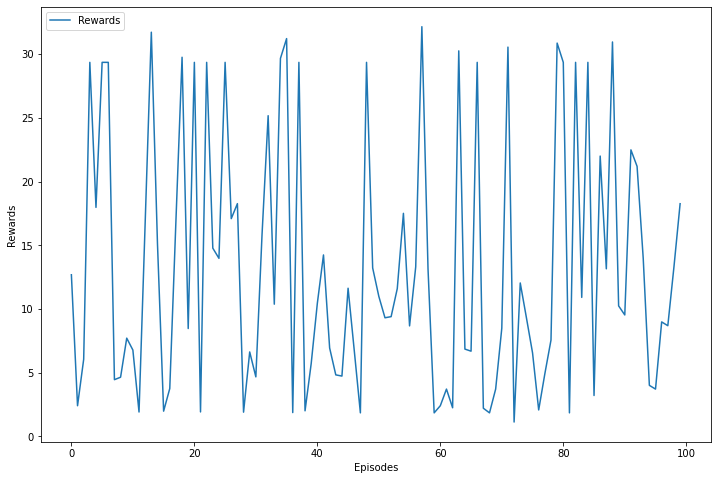

13.346717489622533
10.106061201954207


In [29]:
evaluate_results(rewards_episode)

Debido a que la nueva capa añadida a la red neuronal parece empeorar el modelo, nos quedaremos con la configuración anterior, es decir, con dos capas de 256 neuronas

In [30]:
model = DQN(DQNPolicy, "highway-v0",
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.01,
            batch_size=100,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Creating environment from the given name 'highway-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [31]:
model.learn(5000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 29       |
|    total_timesteps  | 61       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.791    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 53       |
|    total_timesteps  | 110      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.705    |
| time/               |          |
|    episodes       

In [32]:
model.save("dqn_initial")

## Ejercicio 2.3 (0.5 puntos)

In [62]:
model = DQN.load("dqn_initial")

In [63]:
rewards_episode = []
last_velocity_before_done_episode = []
last_velocity_episode = []
crashed_episode = []
last_velocity_before_done = 0
last_velocity = 0
for i_episode in range(100):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _= model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        if not done:
            last_velocity_before_done = info['speed']
        else:
            last_velocity = info['speed']
    rewards_episode.append(total_reward)
    last_velocity_before_done_episode.append(last_velocity_before_done)
    last_velocity_episode.append(last_velocity)
    crashed_episode.append(info['crashed'])
env.close()

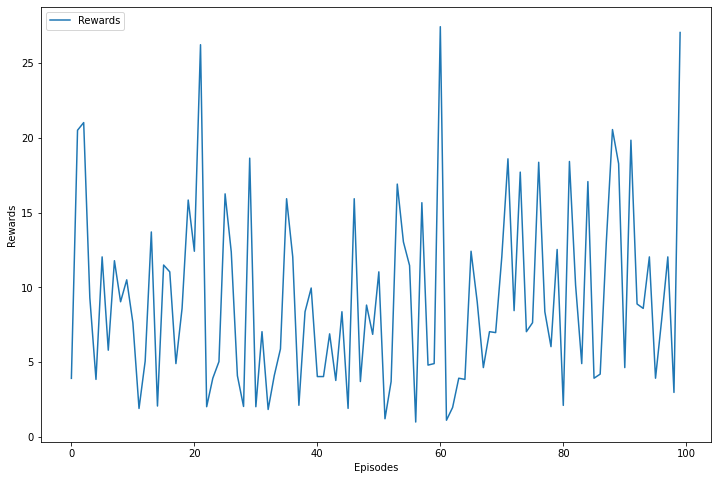

9.26134798355474
6.235533833661569


In [64]:
evaluate_results(rewards_episode)

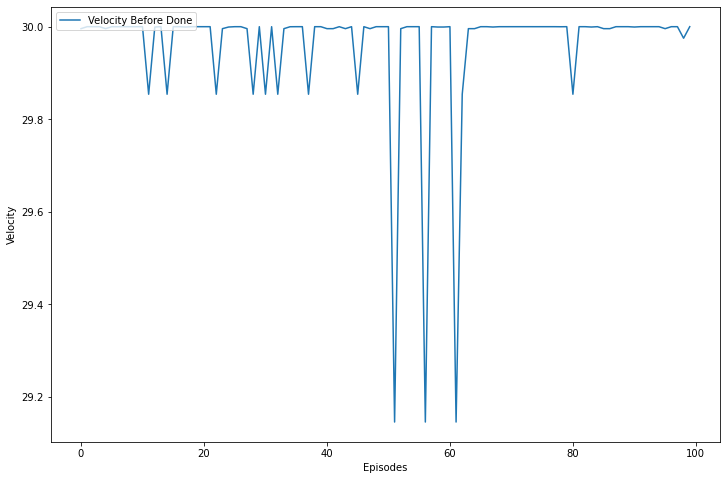

In [65]:
plt.figure(figsize=(12,8))
plt.plot(last_velocity_before_done_episode, label = "Velocity Before Done")
plt.xlabel('Episodes')
plt.ylabel('Velocity')
plt.legend(loc="upper left")
plt.show()


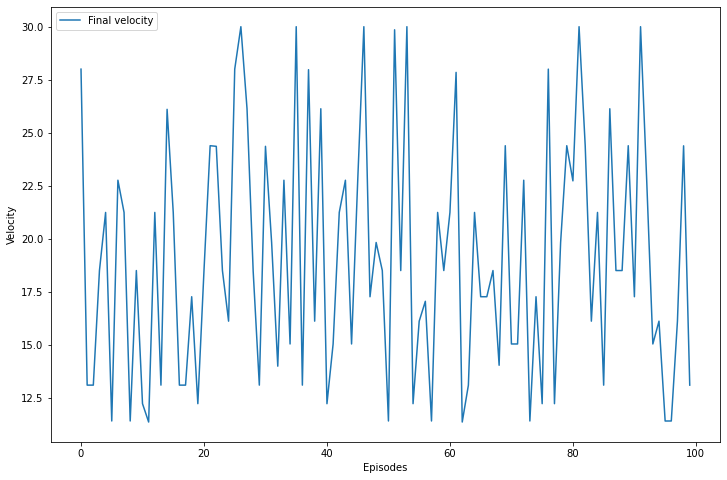

In [66]:
plt.figure(figsize=(12,8))
plt.plot(last_velocity_episode, label = "Final velocity")
plt.xlabel('Episodes')
plt.ylabel('Velocity')
plt.legend(loc="upper left")
plt.show()


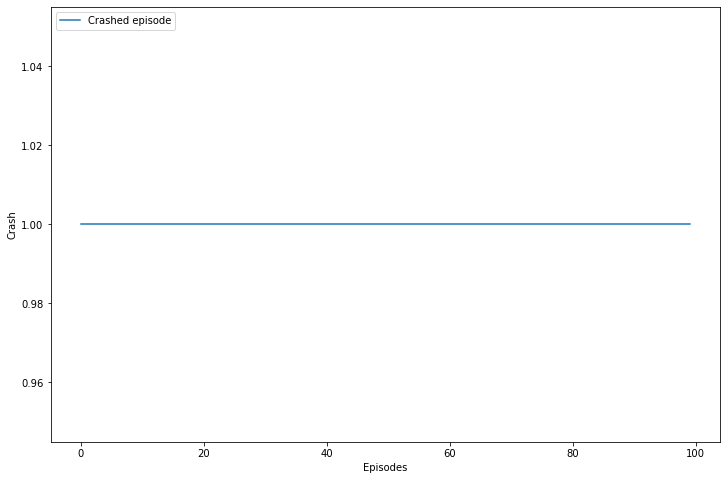

In [67]:
plt.figure(figsize=(12,8))
plt.plot(crashed_episode, label = "Crashed episode")
plt.xlabel('Episodes')
plt.ylabel('Crash')
plt.legend(loc="upper left")
plt.show()


## Ejercicio 3.1 (2 puntos)

In [68]:
env = gym.make("highway-v0")

In [69]:
env.config['observation']['type'] = 'TimeToCollision'

In [70]:
env.config['observation']['horizon'] = 10

In [43]:
env.config

{'observation': {'type': 'TimeToCollision', 'horizon': 10},
 'action': {'type': 'DiscreteMetaAction'},
 'simulation_frequency': 15,
 'policy_frequency': 1,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'screen_width': 600,
 'screen_height': 150,
 'centering_position': [0.3, 0.5],
 'scaling': 5.5,
 'show_trajectories': False,
 'render_agent': True,
 'offscreen_rendering': False,
 'manual_control': False,
 'real_time_rendering': False,
 'lanes_count': 4,
 'vehicles_count': 50,
 'controlled_vehicles': 1,
 'initial_lane_id': None,
 'duration': 40,
 'ego_spacing': 2,
 'vehicles_density': 1,
 'collision_reward': -1,
 'right_lane_reward': 0.1,
 'high_speed_reward': 0.4,
 'lane_change_reward': 0,
 'reward_speed_range': [20, 30],
 'offroad_terminal': False}

In [66]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=32,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Ejercicio 3.2 (2 puntos)

In [67]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

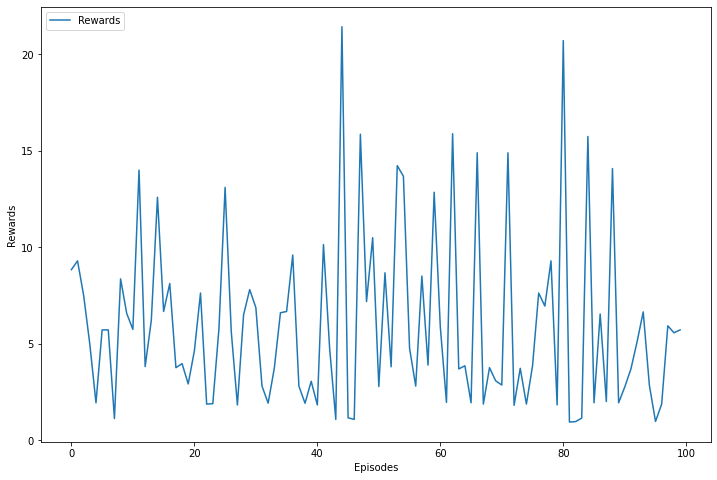

6.013088714759797
4.566141322767165


In [68]:
evaluate_results(rewards_episode)

Aumentamos el valor de **batch_size**

In [78]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [79]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

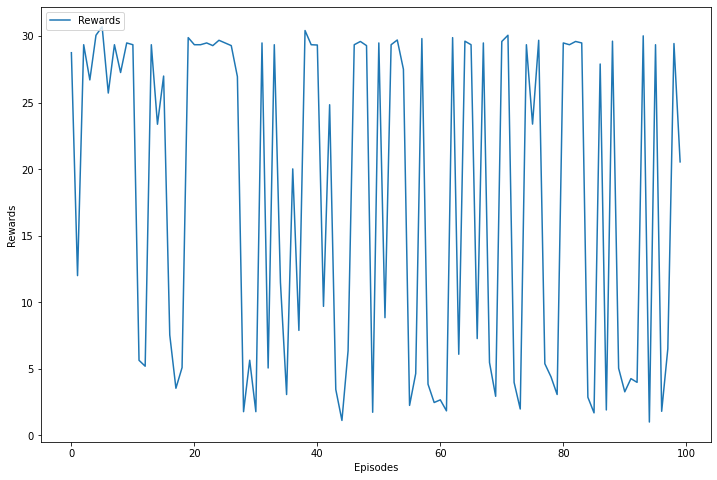

17.99396492779255
12.26983493511681


In [80]:
evaluate_results(rewards_episode)

Como ha resultado una mejoría, nos quedamos con el nuevo valor de **batch_size**

Aumentamos el valor de **target_update_interval**

In [81]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=10000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [82]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

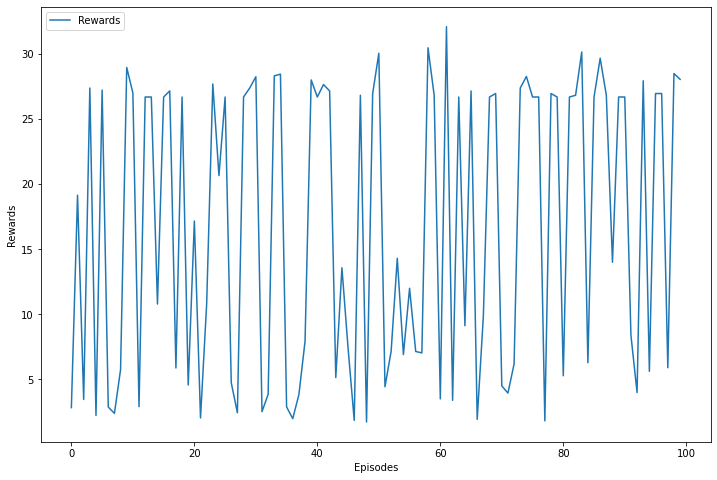

16.760049298368394
11.144704826325576


In [83]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **target_update_interval**

Aumentamos el valor de **train_freq**

In [84]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=10000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 7,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [85]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

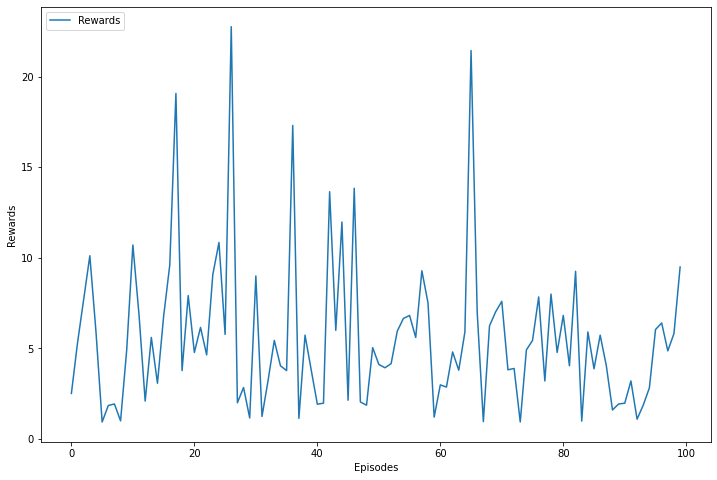

5.590807013828307
4.166742940441754


In [86]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **train_freq**

Disminuimos el valor de **learning_rate**

In [88]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.0001,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=10000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 7,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [89]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

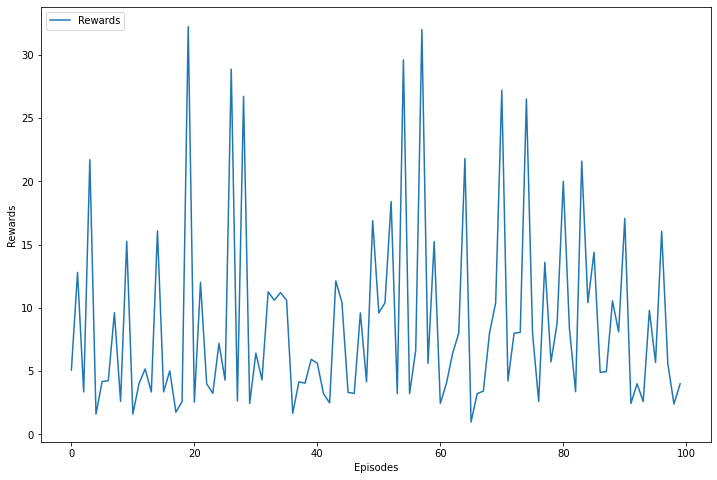

8.826864323792979
7.492769405226548


In [90]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **learning_rate**

In [91]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.01,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=10000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 7,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [92]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

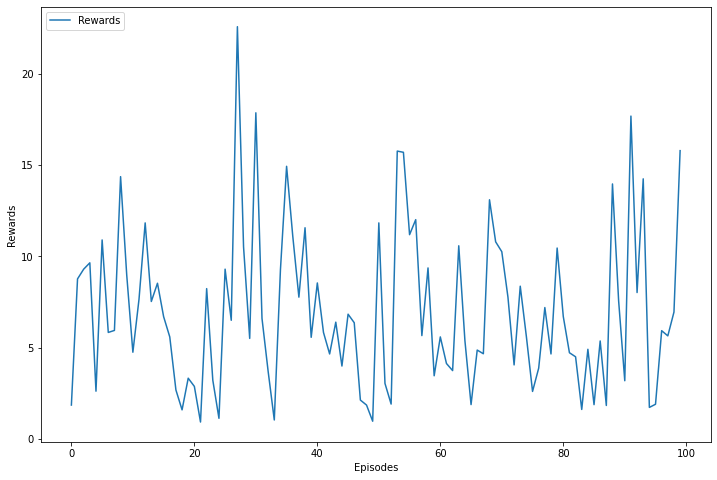

7.0047502245754005
4.401094111883878


In [93]:
evaluate_results(rewards_episode)

Como no ha resultado una mejoría, nos quedamos con el valor anterior de **learning_rate**

Aumentamos el número de neuronas presentes en las capas de la red neuronal que estamos utilizando (**net_arch**)

In [97]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[500, 500]),
            learning_rate=0.001,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [98]:
env.reset()
rewards_episode, len_episode = evaluate_policy(model, env, n_eval_episodes=100, return_episode_rewards=True)

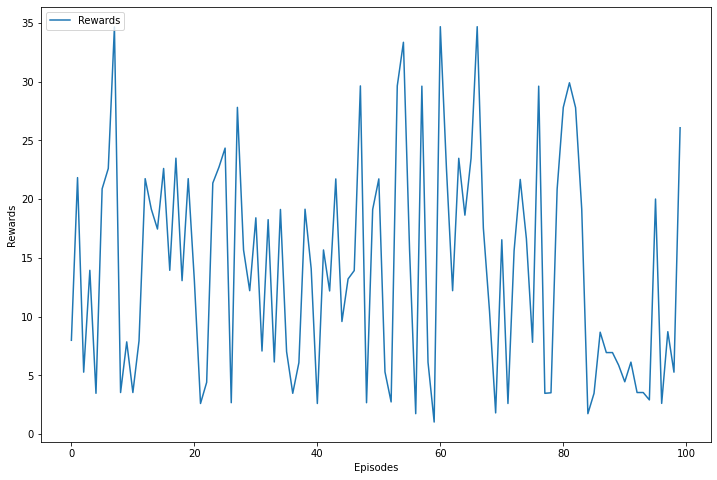

14.182743523418903
9.460530589729952


In [99]:
evaluate_results(rewards_episode)

Debido a que el aumento de neuronas a utilizar en la red neuronal parece empeorar el modelo, nos quedaremos con la configuración anterior, es decir, con dos capas de 256 neuronas

In [103]:
env.reset()
model = DQN(DQNPolicy, env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=0.001,
            batch_size=200,
            buffer_size=1000,
            target_update_interval=1000,
            gamma=0.99,
            exploration_initial_eps=1,
            train_freq = 3,
            verbose=1
           )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [104]:
model.learn(5000)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 8.89     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 23       |
|    total_timesteps  | 48       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.797    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 51       |
|    total_timesteps  | 107      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 11.3     |
|    exploration_rate | 0.656    |
| time/               |          |
|    episodes       

In [105]:
model.save("dqn_secondary")

In [71]:
model = DQN.load("dqn_secondary")

In [72]:
rewards_episode = []
last_velocity_before_done_episode = []
last_velocity_episode = []
crashed_episode = []
last_velocity_before_done = 0
last_velocity = 0
for i_episode in range(100):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _= model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        if not done:
            last_velocity_before_done = info['speed']
        else:
            last_velocity = info['speed']
    rewards_episode.append(total_reward)
    last_velocity_before_done_episode.append(last_velocity_before_done)
    last_velocity_episode.append(last_velocity)
    crashed_episode.append(info['crashed'])
env.close()

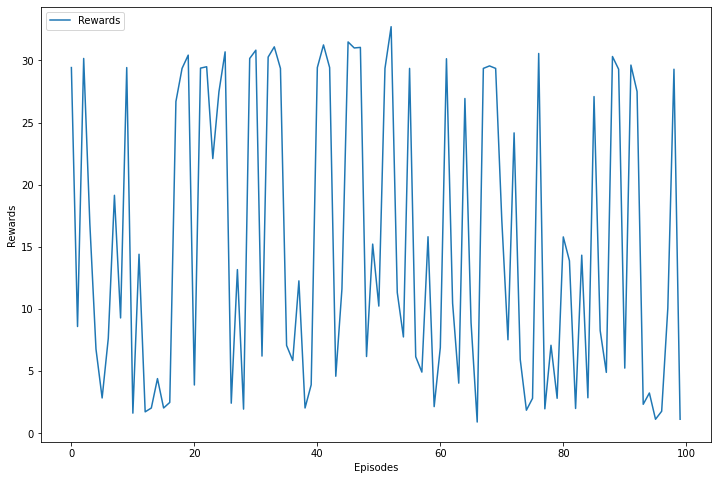

15.348231444698571
11.720461029101086


In [73]:
evaluate_results(rewards_episode)

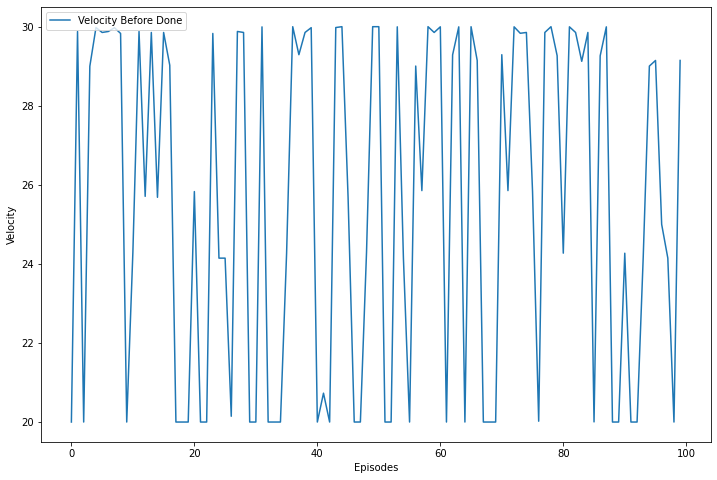

In [74]:
plt.figure(figsize=(12,8))
plt.plot(last_velocity_before_done_episode, label = "Velocity Before Done")
plt.xlabel('Episodes')
plt.ylabel('Velocity')
plt.legend(loc="upper left")
plt.show()


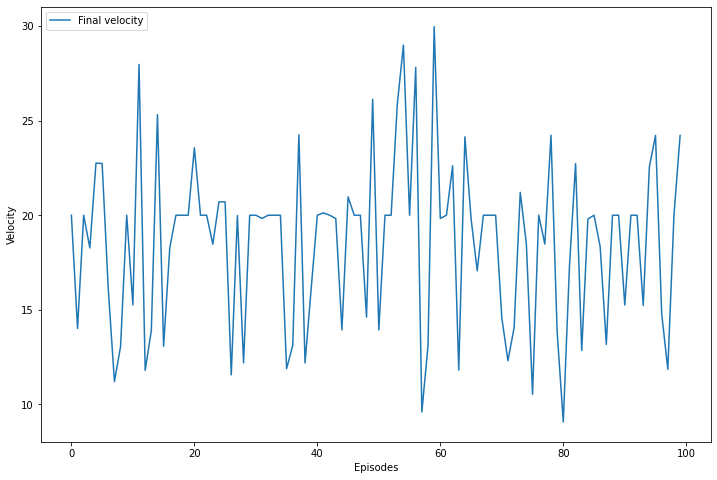

In [75]:
plt.figure(figsize=(12,8))
plt.plot(last_velocity_episode, label = "Final velocity")
plt.xlabel('Episodes')
plt.ylabel('Velocity')
plt.legend(loc="upper left")
plt.show()


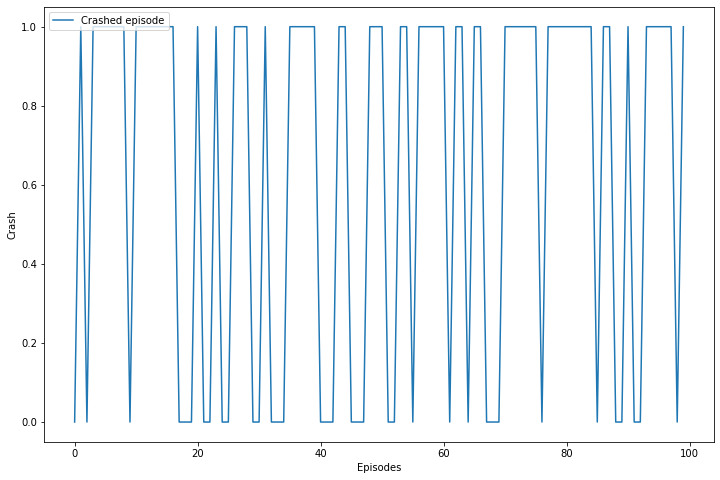

In [76]:
plt.figure(figsize=(12,8))
plt.plot(crashed_episode, label = "Crashed episode")
plt.xlabel('Episodes')
plt.ylabel('Crash')
plt.legend(loc="upper left")
plt.show()
